# Python Workflow

Let's explore an example PyTorch end-to-end workflow.

Resources:

- [`Ground truth notebook`](https://github.com/mrdourke/python-deep-learning/blob/main/01_pytorch_workflow.ipynb)
- [`Book version of notebook`](https://www.learnpytorch.io/01_pytorch_workflow/)

- **[PyTorch Video🔥🔥](https://www.youtube.com/watch?v=LyJtbe__2i0)**

In [1]:
what_we_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluting a model (inference)",
    5: "save and loading a model",
    6: "putting it all together"
}
what_we_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'save and loading a model',
 6: 'putting it all together'}

In [1]:
import torch
from torch import nn # nn contains all of PyTorch's building for neural networks

import matplotlib.pyplot as plt

#check pytorch version
torch.__version__

'2.7.0+cpu'

### 1. Data (Preparing and Loading)
Data can be almost anything.. in machine learning.

- Excel spreadsheet
- Image of any kind
- Videos (Youtube has lots of data)...
- DNA
- Text

Machine learning is game of two parts:
1. Get data into a numerical representaion.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **Parameters**

In [3]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start =0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X +bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

### Splitting  data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [5]:
# create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

### Building 

How might we better visualize our data ?
"Visualize, Visualize, Visualize "

In [8]:
def plot_predictions(train_data =X_train,
                     train_labels =y_train,
                     test_data = X_test,
                     test_labels =y_test,
                     predictions =None
                     ):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels, c="y", s=4, label 
    ="Training data")
    plt.scatter(test_data,test_labels, c="r", s=4, label 
    ="Test data")

    if predictions is not None:
        plt.scatter(test_data,predictions, c='b',s=4, label ="Prediction")
    
    plt.legend(prop={"size":14})
    plt.show()

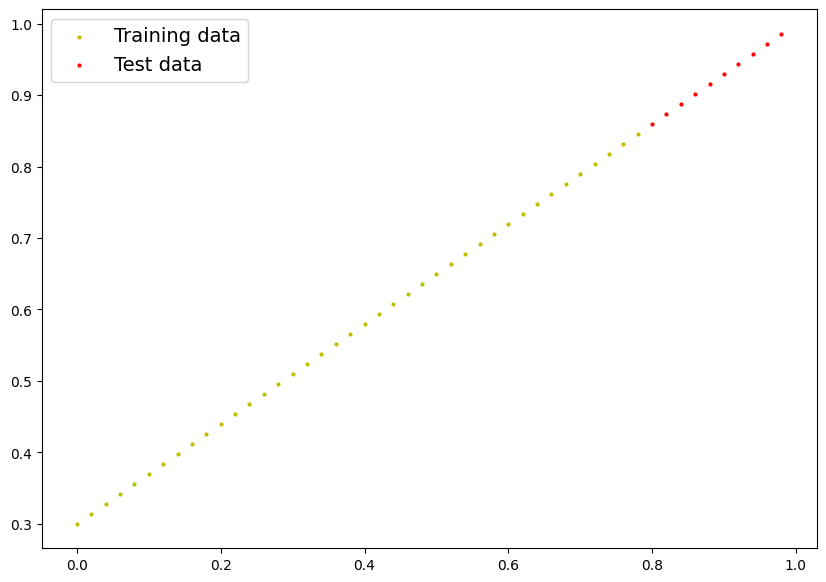

In [8]:
plot_predictions()

### Creating our first pytorch model for linear regression.
Our first pytorch model
this is very exciting... let's do it!
Because we're going to be building classes throughout the course, I'd recommend getting familiar with OOP in Python, to do so you can use the following resource from [Real Python](https://realpython.com/python3-object-oriented-programming)

What our model does:
- Start with random values (weight & bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weights & bias values we used to create the data).

How does it do so ?

Through two main algorithms:
1. Gradient Descent
2. Backpropagation

In [9]:
# creating a linear regression model class

class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(
            torch.randn(
                        1,
                        requires_grad=True,
                        dtype=torch.float
                        ))

        self.bias = nn.Parameter(torch.randn(
                        1,
                        requires_grad=True,
                        dtype=torch.float,
                        ))
    
    # Forward method to define the computation in the model:
    def forward(self,x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights*x + self.bias # this is the linear regression formula

### Discussing some of the most important pyTorch Model Building Classes

PyTorch model building essentials
- `torch.nn` - contains all of the building blocks for computational graphs (a neural network can be considered as a computational graph)
- `torch.nn.Parameter` - what parameters should our model try and learn, often a pyTorch layer from torch.nn will these for us.
- `torch.nn.Module` - The base class for all neural network subclasses, if you should overwrite forward()
- `torch.optim` - this is used where the optimizers in PyTorch live, they will help with gradient descent
- `def forward()` - All nn.Module subclass require you to overwrite forward(), this method defines what happens in the forward computation.
- `torch.utils.data.Dataset` - Represents a map between key (label) and sample (features) pairs of your data. Such as images and their associated labels.
- `torch.utils.data.Dataloader` - Creates a Python iterable over a torch Dataset (allows you to iterate over your data).

[Pytorch Cheat Sheet](https://docs.pytorch.org/tutorials/beginner/ptcheat.html)

### Checking the content of our PyTorch model

Now we've created a model, let's see what's inside...
So, we can check our model parameters or what's inside our model using `parameters()`.

In [10]:
# Creating a random seed
torch.manual_seed(42)

# Creating an instance of this model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.weights, model_0.bias

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True))

### Making Predictions using model using `torch.inference_mode()`

To check our model's predictive power, let's see how well its practice **y_test** based on **x_test**.
When we pass the data through our model, it's going to run it through the **forward()** method.



In [12]:
# Make predictions with model:

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

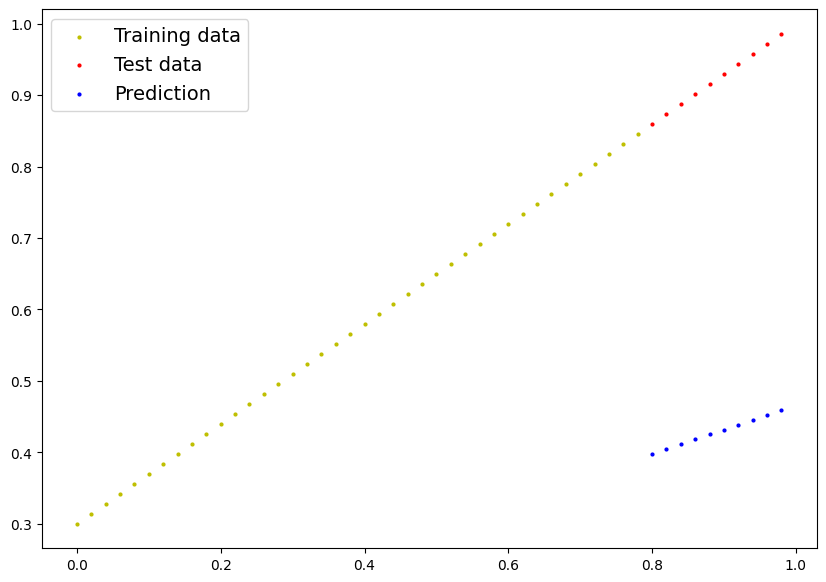

In [14]:
plot_predictions(predictions=y_preds)

### 3. Training model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters. 

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model prediction is use Loss Functions

- Note: Loss function may also be called as cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

- **Loss function:** A function to measure how wrong your model's prediction are to the ideal ouptuts, lower is better.

- **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (eg. weights & bias)

And specially for PyTorch, we need:
- A Training loop
- A Testing loop

### Loss Functions for Regression
- `nn.L1Loss`: Creates a criterion that measures the mean absolute error (MAE) between each element in the input x and target y.
- `nn.L2Loss`: reates a criterion that measures the mean squared error (squared L2 norm) between each element in the input x and target y.

There are other many loss functions for regression task but these two are most widely used.

### Loss Function for Classification 
- `nn.CrossEntropyLoss` - This criterion computes the cross entropy loss between input logits and target.
- `nn.BCELoss` - Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities:

In [15]:
# Setup a loss function

loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)
# lr = learning rate - possibly the most important hyperparameter you can set. 

In [16]:
loss_fn 

L1Loss()

### Building a training loop and a testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. forward pass (this involves data moving through our model's forward() functions) to make prediction on data - also called **forward propagation**
2. Calculate the loss (compute forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through teh network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer steps

In [17]:
# An epoch is one loop through the data... (this is a hyperparameters because we've set it ourselves.)
epochs =200

# Track different values
epoch_count =[]
loss_values =[]
test_loss_values =[]

### Training
# 0. Loop through the data
for epoch in range(epochs):
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss w.r.t the parameters of the model
    loss.backward()

    # 5. Step to optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so, we have to zero them above in step 3 for he next iteration of the loop

    ### Testing
    model_0.eval() # turns off gradient tracking // turns off different settings in the model not needed for evaluation/training

    ## No learning during testing.
    with torch.no_grad(): ## works similarly like inference mode but inference mode is better. It was widely used in old codes.
        pass 

    with torch.inference_mode(): ## turns off gradient tracking and couple of more things behind the scenes 
        
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred,y_test)

        # Printing out what's happening
        if epoch %10 == 0:
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f"Epoch: {epoch} | Loss: {loss} | Test loss:  {test_loss}")

            # print out model state_dict()
            print(model_0.state_dict())






Epoch: 0 | Loss: 0.31288138031959534 | Test loss:  0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss:  0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss:  0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss:  0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss:  0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss:  0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss:  0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

In [18]:
y_preds.shape

torch.Size([10, 1])

In [19]:
# Assignment: To rewrite the training loop
epoches =1000

for epoch in range(epoches):
    model_0.train()
    y_predict = model_0(X_train)

    loss = loss_fn(y_predict, y_train)

    optimizer.zero_grad()

    loss.backward()
    print(f"loss: {loss}")

    optimizer.step()

    model_0.eval()
    
    #print out model state_dict()
    print(model_0.state_dict())

loss: 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
loss: 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loss: 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
loss: 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loss: 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
loss: 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loss: 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
loss: 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
loss: 0.008932482451200485
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
loss: 0.0025885067880153656
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]

In [20]:
weight, bias

(0.7, 0.3)

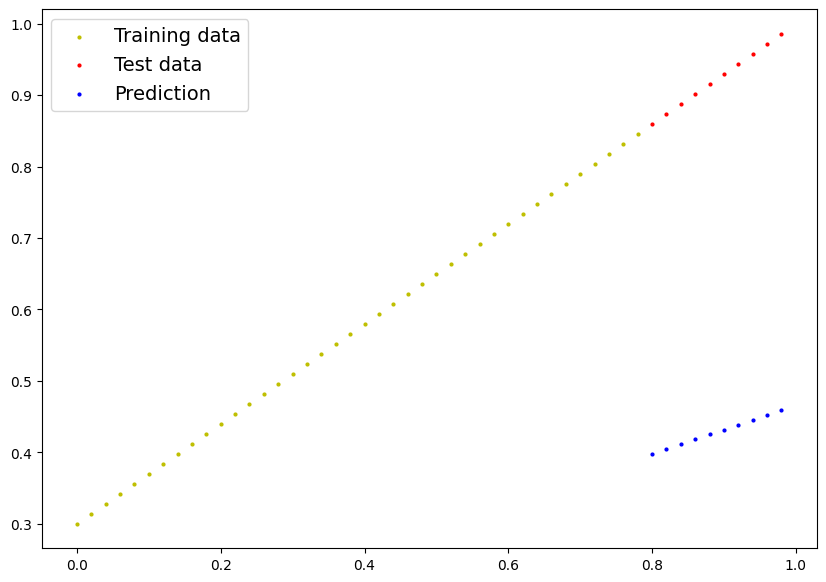

In [21]:
## Before
plot_predictions(predictions= y_preds)

In [22]:

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

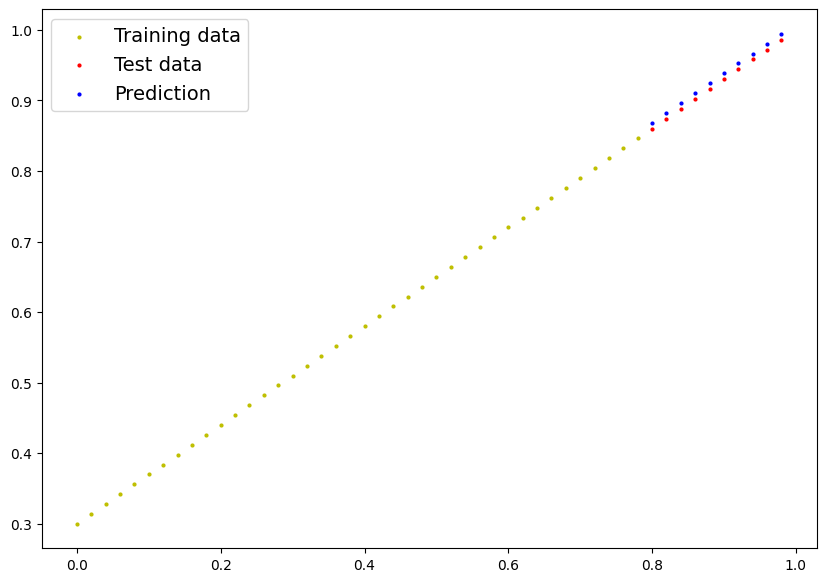

In [23]:
## After
plot_predictions(predictions= y_preds)

In [11]:
import numpy as np

In [25]:
loss_values, test_loss_values ## see these aren't actually an array and for the plot we need an array so, we do following things.
loss_values = np.array(torch.tensor(loss_values).cpu().numpy())
test_loss_values = np.array(torch.tensor(test_loss_values).cpu().numpy())

In [26]:
loss_values, test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 array([0.48106518, 0.3463552 , 0.2172966 , 0.14464018, 0.11360953,
        0.09919948, 0.08886633, 0.08059376, 0.07232123, 0.06473556,
        0.05646304, 0.0481905 , 0.04060482, 0.03233228, 0.02405975,
        0.01647409, 0.00820156, 0.00502309, 0.00502309, 0.00502309],
       dtype=float32))

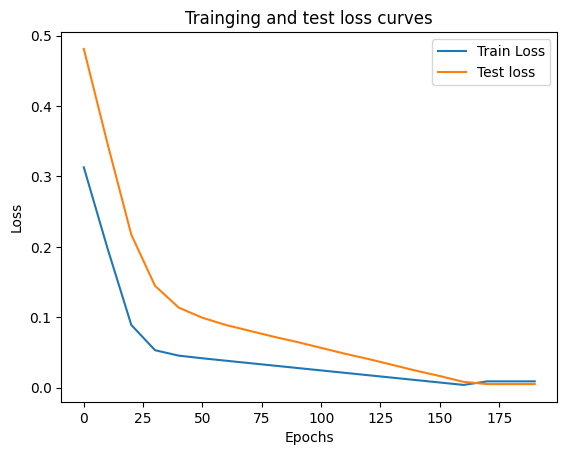

In [ ]:
# plot the loss curves

# epoch_count, loss_values, test_loss_values
plt.plot(epoch_count,loss_values, label="Train Loss")
plt.plot(epoch_count,test_loss_values, label="Test loss")
plt.legend()
plt.title("Trainging and test loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

### Writting Code to save a PyTorch Model

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save` - allows you to save a PyTorch object in Python's pickle format.
2. `torch.load` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary
[PyTorch save & load](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)

In [29]:
# saving  our PyTorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Creae model save path
MODEL_NAME = "0_1_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH /MODEL_NAME

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj= model_0.state_dict(), f= MODEL_SAVE_PATH)

Saving model to: models\0_1_pytorch_workflow_model_0.pth


### Writting code to load a pytorch model

Since we saved our model's `state_dict()` rather the entire mdoel, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [34]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))



<All keys matched successfully>

In [35]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [36]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [37]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together

let's go back through the steps above and see it all in one place.

In [38]:
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

# check PyTorch version
torch.__version__

'2.7.0+cpu'

### Create device-agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computing). If no GPU is available, the code will default to using CPU.

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [2]:
# create some data using the linear regression formula of y = weight * X + bias
weight =0.7
bias = 0.3

# Create range values
start =0
end =1
step = 0.02

# Create X and y
X = torch.arange(start=start, end=end, step=step).unsqueeze(dim=1)

y = weight * X + bias

X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [3]:
# split data

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
X_train.shape, y_train.shape

(torch.Size([40, 1]), torch.Size([40, 1]))

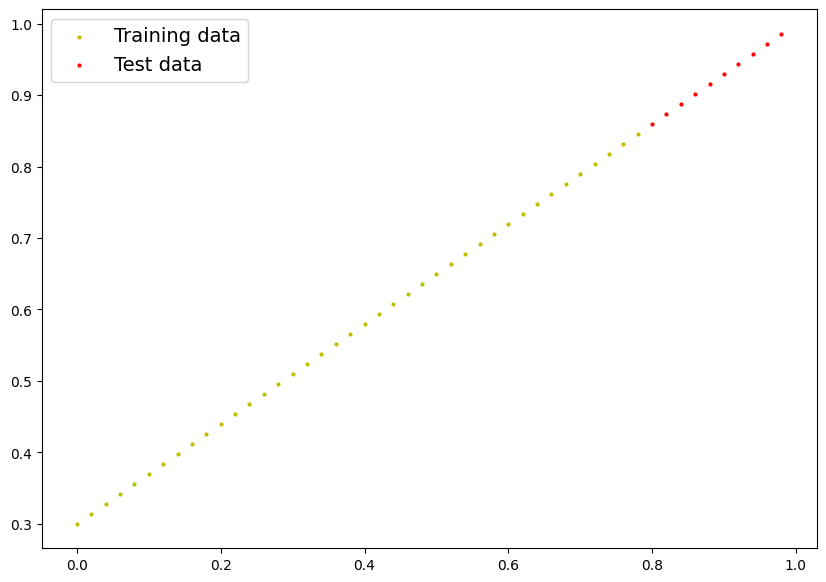

In [13]:
# plot the data
# Note: If you don't have the plot_predictions() function loaded, this will error
plot_predictions(X_train,y_train,X_test,y_test)

### 6.2 Building a PyTorch Linear Model

In [4]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(X)
    
# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### This above does exactly the same thing that this code does, but using nn.Linear method, we are using inbuilt function of PyTorch.
<img src="image.png" height=400px>

### 6.3 Training the model

For training we need:
- Loss function
- Optimizer
- Training loop
- Testing loop

In [5]:
# setup a loss function
loss_function = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.001, momentum=0.9)


In [6]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200
for epoch in range(epochs):
    model_1.train()

    # training the model_1
    y_p =model_1(X_train)

    # calculating the L1Loss
    loss = loss_function(y_p, y_train)

    # optimizing the model by setting optimizer to Zero_grad, this should be done before backpropagation step is carried out.
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Testing the model_1
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_function(test_pred, y_test)

        if epoch %10 ==0:
            # print("Epoch: ",epoch) 
            # print(f"Loss: {loss}")
            # print(f"Test Loss: {test_loss}")
            # print(f"Actual Weight: {weight}, Actual bias: {bias}")
            # print(model_1.state_dict(),"\n")
            print(f'Epoch: {epoch}        Loss: {loss}        Test loss: {test_loss}')

Epoch: 0        Loss: 0.5551779866218567        Test loss: 0.5861000418663025
Epoch: 10        Loss: 0.5075028538703918        Test loss: 0.5224591493606567
Epoch: 20        Loss: 0.41584092378616333        Test loss: 0.4125294089317322
Epoch: 30        Loss: 0.3088414967060089        Test loss: 0.286459743976593
Epoch: 40        Loss: 0.19649448990821838        Test loss: 0.15476259589195251
Epoch: 50        Loss: 0.08228273689746857        Test loss: 0.021103043109178543
Epoch: 60        Loss: 0.028999630361795425        Test loss: 0.08879391849040985
Epoch: 70        Loss: 0.03290434926748276        Test loss: 0.0856916755437851
Epoch: 80        Loss: 0.020311953499913216        Test loss: 0.03900006413459778
Epoch: 90        Loss: 0.018505847081542015        Test loss: 0.031120669096708298
Epoch: 100        Loss: 0.014496037736535072        Test loss: 0.037969451397657394
Epoch: 110        Loss: 0.010923855006694794        Test loss: 0.024667685851454735
Epoch: 120        Loss: 0.0

In [7]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7004]])),
             ('linear_layer.bias', tensor([0.2992]))])

In [22]:
y_p = model_1(X_test).detach().numpy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_p.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]),
 (10, 1))

In [24]:
y_p

array([[0.85954195],
       [0.8735495 ],
       [0.88755715],
       [0.9015648 ],
       [0.91557235],
       [0.92958003],
       [0.9435876 ],
       [0.9575952 ],
       [0.9716028 ],
       [0.9856104 ]], dtype=float32)

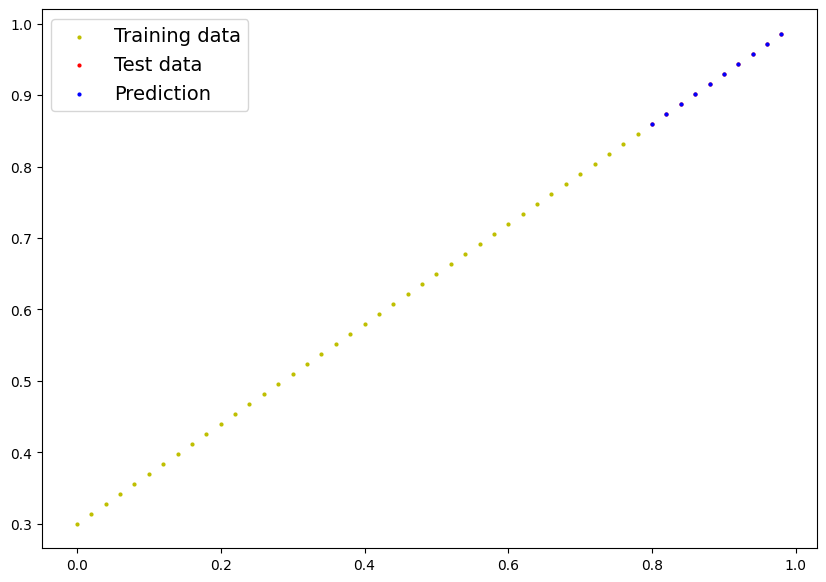

In [23]:
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_p)

### Saving and Loading the trained model♾️

In [27]:
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME = "0_1_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH/ MODEL_NAME

#3. Save the model state dict
print(f"Saving mode to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),f=MODEL_SAVE_PATH)

Saving mode to: models\0_1_pytorch_workflow_model_1.pth


In [28]:
#Load a pytorch model

# Create a new instance of Linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7004]])),
             ('linear_layer.bias', tensor([0.2992]))])

In [30]:
# Evalute the loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_p == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])